In [2]:
print("The start of Optimisation HW1!")

print("These are not the droids you're looking for")

The start of Optimisation HW1!
These are not the droids you're looking for


In [ ]:
#Import relevant libraries
import sklearn
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [ ]:
# Define weight arrays

#Array w is the weights array between labelled examples and unlabelled examples

w_rows = []

for point in unlabelled:
    row = []
    for point2 in points_l:
        d = np.exp(-0.5*(math.dist(point, point2))**2)
        row.append(d)
    w_rows.append(row)

w = np.array(w_rows)

#Array w_ is between unlabelled.

rows = []

for points in unlabelled:
    row=[]
    for point2 in unlabelled:
        d = np.exp(-0.5*(math.dist(point, point2))**2)
        row.append(d)
    rows.append(row)

w_ = np.array(rows)

print(w.shape, w_.shape)

(500, 50) (500, 500)


In [127]:
def createDataset():
    #Let's start to generate the points using two functions: sine and cosine
    range = (-5*np.pi, 5*np.pi)
    n = 5000 #number of points
    x_0 = np.random.uniform(*range, n//2)
    f_sin = np.sin(0.6*x_0) #function for class -1
    f_cos = np.cos(0.6*x_0+np.pi/2) #fuction for class 1

    #Visualize the graphs without noise
    plt.figure(figsize=(8, 4), dpi=100)
    plt.title("Graphs of sin and cos without noise")
    plt.scatter(x_0, f_sin, alpha=0.6, s=30)
    plt.scatter(x_0, f_cos, alpha=0.6, s=30)
    plt.legend(["Class -1 (sin)", "Class 1 (cos)"])
    plt.xlim(-15, 15)
    plt.ylim(-2, 2)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    #Let's add some noise 
    noise = np.random.normal(0, 0.1, len(x_0))
    new_fsin = f_sin + noise
    new_fcos = f_cos + noise 

    #Graphs visualization with noise 
    plt.figure(figsize=(8, 4), dpi=100)
    plt.title("Graphs of sin and cos with noise")
    plt.scatter(x_0, new_fsin, alpha=0.6, s=30)
    plt.scatter(x_0, new_fcos, alpha=0.6, s=30)
    plt.legend(["Class -1 (sin)", "Class 1 (cos)"])
    plt.xlim(-15, 15)
    plt.ylim(-2, 2)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    class_0 = np.array(list(zip(x_0, new_fsin)))
    class_1 = np.array(list(zip(x_0, new_fcos)))

    return class_0, class_1

def split_data(class0, class1, labeled_pct, initialize_random=True):
    scaler = StandardScaler().fit(np.concatenate((class0, class1)))
    split_0 = int(len(class0) * labeled_pct) #number of data with labels according to percentage provided for class 0
    split_1 = int(len(class1) * labeled_pct) #same for class 1

    x_bar_0 = scaler.transform(class0[:split_0]) #transforms on the range of the labeled data 
    x_bar_1 = scaler.transform(class1[:split_1])
    x_0 = scaler.transform(class0[split_0:]) #transforms on the range of the unlabeled data 
    x_1 = scaler.transform(class1[split_1:])

    #Creating the labels and variables for label and unlabel data 
    y_bar_0 = np.full(len(x_bar_0), -1) #assigns -1 to a vector of size x_bar_0, creating labeled data for class -1
    y_bar_1 = np.full(len(x_bar_1), 1)  #assigns 1 to a vector of size x_bar_1, creating labeled data for class 1 
    y_0 = np.full(len(x_0), -1) #creating the target vector for class -1
    y_1 = np.full(len(x_1), 1) #creating the target vector for class 1 

    #Concatenates variables of both classes to create label and unlabel variables 
    x_labeled = np.concatenate((x_bar_0, x_bar_1)) #list of coordinates (x, y) of labeled data 
    y_labeled = np.concatenate((y_bar_0, y_bar_1)) #list of classes 
    x_unlabeled = np.concatenate((x_0, x_1)) #list of coordiantes (x, y) of unlabeled data
    y_unlabeled_target = np.concatenate((y_0, y_1)) #list of target classes

    #2 ways to initialize the labels to predict 
    if initialize_random:
        y_unlabeled_initial = np.random.choice([-1, 1], len(x_unlabeled))
    else:
        y_unlabeled_initial = np.zeros(len(x_unlabeled))

    return x_labeled, y_labeled, x_unlabeled, y_unlabeled_target, y_unlabeled_initial

def plottingData(x_labeled, y_labeled, x_unlabeled, y_unlabeled_target):
    plt.figure(figsize=(8, 4), dpi=100)
    plt.title("Unlabeled points true value")
    plt.scatter([p[0] for p in x_unlabeled[y_unlabeled_target == 1]], [p[1] for p in x_unlabeled[y_unlabeled_target == 1]], alpha=0.6, s=30)
    plt.scatter([p[0] for p in x_unlabeled[y_unlabeled_target == -1]], [p[1] for p in x_unlabeled[y_unlabeled_target == -1]], alpha=0.6, s=30)
    plt.legend(["Class -1 (sin)", "Class 1 (cos)"])
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    plt.figure(figsize=(8, 4), dpi=100)
    plt.title("Labeled points true value")
    plt.scatter([p[0] for p in x_labeled[y_labeled == 1]], [p[1] for p in x_labeled[y_labeled == 1]], alpha=0.6, s=30)
    plt.scatter([p[0] for p in x_labeled[y_labeled == -1]], [p[1] for p in x_labeled[y_labeled == -1]], alpha=0.6, s=30)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    plt.figure(figsize=(8, 4), dpi=100)
    plt.title("Labeled and unlabeled points")
    plt.scatter([p[0] for p in x_unlabeled], [p[1] for p in x_unlabeled], c="grey")
    plt.scatter([p[0] for p in x_labeled[y_labeled == -1]], [p[1] for p in x_labeled[y_labeled == -1]], alpha=0.6, s=30)
    plt.scatter([p[0] for p in x_labeled[y_labeled == 1]], [p[1] for p in x_labeled[y_labeled == 1]], alpha=0.6, s=30)
    plt.legend(["Unlabeled", "Labeled 1", "Labeled -1"])
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    return 

def prepareArtifitialData():
    class0, class1 = createDataset()
    x_labeled, y_labeled, x_unlabeled, y_unlabeled_target, y_unlabeled_initial = split_data(class0, class1, 0.1)
    plottingData(x_labeled, y_labeled, x_unlabeled, y_unlabeled_target)
    return x_labeled, y_labeled, x_unlabeled, y_unlabeled_target, y_unlabeled_initial

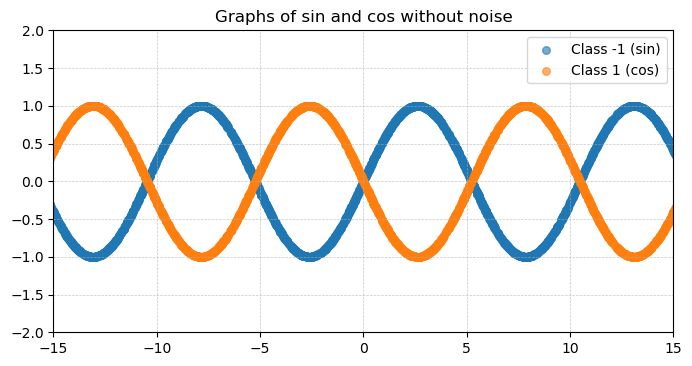

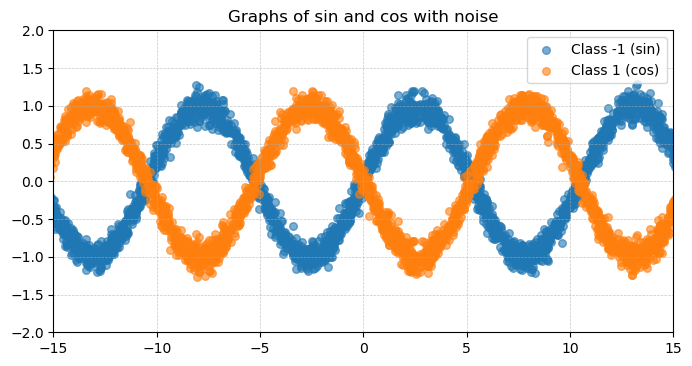

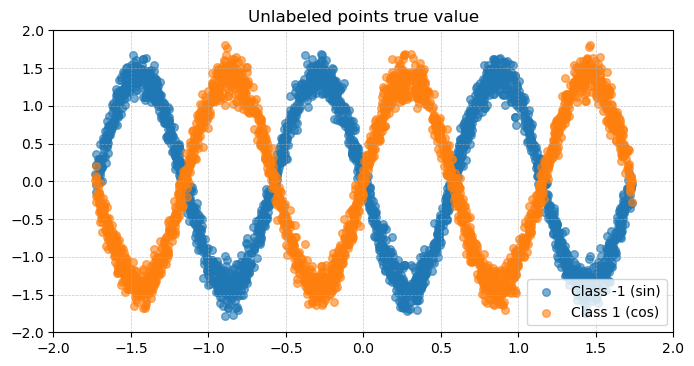

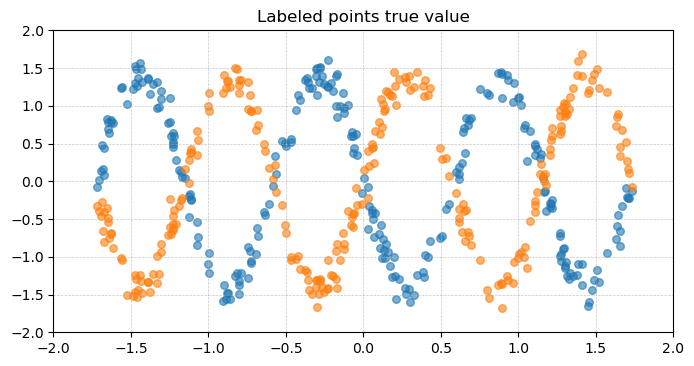

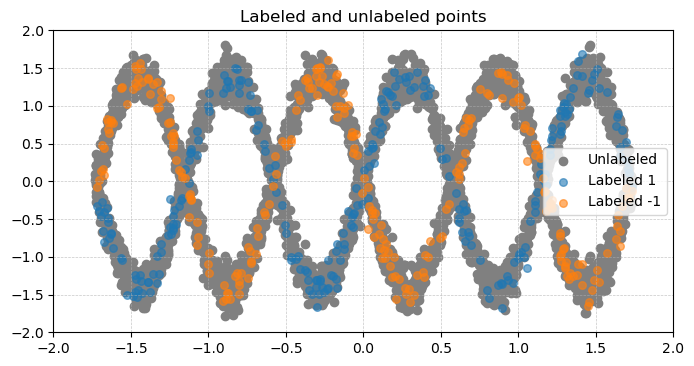

In [128]:
x_labeled, y_labeled, x_unlabeled, y_unlabeled_target, y_unlabeled_initial = prepareArtifitialData()